In [30]:
import torch
import matplotlib.pyplot as plt

In [23]:
torch.linspace(0, 1, steps=10)

tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])

In [24]:
x0 = torch.randn(2, 3, 32, 32)
# betas = torch. tensor([0.05, 0.1, 0.15, 0.2, 0.25])
betas = torch.linspace(0, 1, steps=10)
alpha = 1 - betas

In [25]:
betas

tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])

In [26]:
alpha

tensor([1.0000, 0.8889, 0.7778, 0.6667, 0.5556, 0.4444, 0.3333, 0.2222, 0.1111,
        0.0000])

In [27]:
t = torch.tensor([1, 3])

In [28]:
alpha_hat = torch.cumprod(alpha, 0)
alpha_hat

tensor([1.0000e+00, 8.8889e-01, 6.9136e-01, 4.6091e-01, 2.5606e-01, 1.1380e-01,
        3.7935e-02, 8.4299e-03, 9.3666e-04, 0.0000e+00])

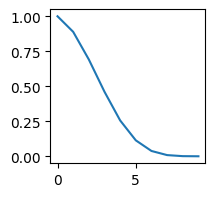

In [35]:
plt.figure(figsize=(2,2))
plt.plot(alpha_hat)

In [31]:
result = alpha_hat.gather(0, t).reshape(-1, 1, 1, 1)
result

tensor([[[[0.8889]]],


        [[[0.4609]]]])

In [20]:
x0.shape, result.shape

(torch.Size([2, 3, 32, 32]), torch.Size([2, 1, 1, 1]))

In [38]:
noise = torch.rand_like(x0)
mean = result.sqrt() * x0   
var = torch.sqrt(1-result) * noise

In [39]:
x_t = mean + var